### Project Setup
Make sure you do the following:

1. Set your project using "%projects set my-project-id"
2. Your cloud project needs to have Machine Learning, BigQuery, and DataFlow API enabled.

In [1]:
bucket = 'gs://' + datalab_project_id() + '-coast'

In [2]:
!gsutil mb $bucket

Creating gs://bradley-playground-coast/...
ServiceException: 409 Bucket bradley-playground-coast already exists.


### Data Preparation

All data is under gs://cloud-datalab/sampledata/coast. Load the data from CSV files to Bigquery table.

In [1]:
import google.datalab.bigquery as bq

# Create the dataset
bq.Dataset('coast').create()

schema = [
  {'name':'image_url', 'type': 'STRING'},
  {'name':'label', 'type': 'STRING'},
]

# Create the table
train_table = bq.Table('coast.train').create(schema=schema, overwrite=True)
train_table.load('gs://cloud-datalab/sampledata/coast/train.csv', mode='overwrite', source_format='csv')
eval_table = bq.Table('coast.eval').create(schema=schema, overwrite=True)
eval_table.load('gs://cloud-datalab/sampledata/coast/eval.csv', mode='overwrite', source_format='csv')

Job bradley-playground/job_--q08bPN87R1yzQIDGjJb3DRvik completed

See the following file for the label description:

In [1]:
!gsutil cat gs://cloud-datalab/sampledata/coast/dict_explanation.csv

In [9]:
%%bq query --name coast_train
SELECT image_url, label FROM coast.train

In [10]:
coast_train.execute().result()

image_url,label
gs://tamucc_coastline/esi_images/IMG_5894_SecC_Sum12_Pt1.JPG,1
gs://tamucc_coastline/esi_images/IMG_2319_SecOP_Sum12_Pt3.jpg,1
gs://tamucc_coastline/esi_images/IMG_6674_SecQN_Sum12_Pt3.jpg,1
gs://tamucc_coastline/esi_images/IMG_9483_SecMO_Sum12_Pt3.jpg,1
gs://tamucc_coastline/esi_images/IMG_0223_SecEFG_Sum12_Pt1.JPG,1
gs://tamucc_coastline/esi_images/IMG_1012_SecEFG_Sum12_Pt1.JPG,1
gs://tamucc_coastline/esi_images/IMG_9996_SecBC_Spr12.jpg,1
gs://tamucc_coastline/esi_images/IMG_0899_SecEFG_Sum12_Pt1.JPG,1
gs://tamucc_coastline/esi_images/IMG_4996_SecEGH_Sum12_Pt2.jpg,1
gs://tamucc_coastline/esi_images/IMG_1281_SecEFG_Sum12_Pt1.JPG,1


### Explore Your Data

Sample the data to around 1000 instances for visualization. Our data is very simple, so we simply draw histogram on the labels and compare training and eval data.

In [6]:
from google.datalab.ml import *

ds_train = BigQueryDataSet(table='coast.train')
ds_eval = BigQueryDataSet(table='coast.eval')

df_train = ds_train.sample(1000)
df_eval = ds_eval.sample(1000)

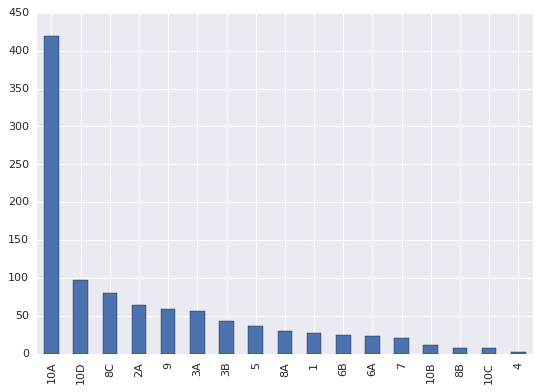

In [7]:
df_train.label.value_counts().plot(kind='bar');

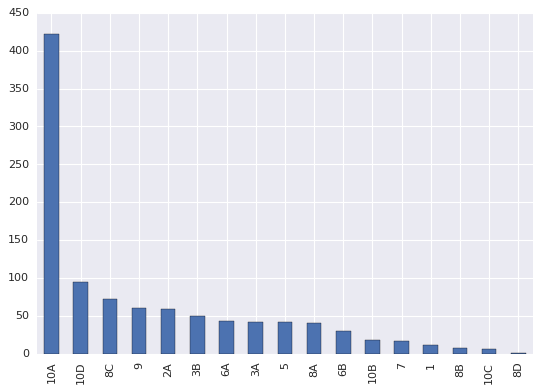

In [8]:
df_eval.label.value_counts().plot(kind='bar');